# Task 2

## Prediction using Unsupervised ML
In this task, the Python Scikit-Learn library for machine learning is used to implement K-Means Clustering algorithm. In this case we are going to group species of iris plants given their various charateristics.

### K-Means Clustering
K-Means is a type of partitioning clustering, that is, it divides the data into K non-overlapping subsets or clusters without any cluster internal structure or labels. This means, it's an unsupervised algorithm. Objects within a cluster are very similar, and objects across different clusters are very different or dissimilar.

### Author: Aadarsh Agarwal

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

Importing the data from drive link provided into our pandas data frame.

In [2]:
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view"
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
iris_df = pd.read_csv(dwn_url,index_col=0)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Predicting the optimum number of clusters
The correct choice of K is often ambiguous because it's very dependent on the shape and scale of the distribution of points in a dataset. There are some approaches to address this problem, but one of the techniques that is commonly used is to run the clustering across the different values of K and looking at a metric of accuracy for clustering. This metric can be mean, distance between data points and their cluster's centroid, which indicate how dense our clusters are or, to what extent we minimize the error of clustering. Then, looking at the change of this metric, we can find the best value for K.

### Elbow Method
But the problem is that with increasing the number of clusters, the distance of centroids to data points will always reduce. This means increasing K will always decrease the error. So, the value of the metric as a function of K is plotted and the elbow point is determined where the rate of decrease sharply shifts. It is the right K for clustering. This method is called the elbow method.

In [3]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.73it/s]


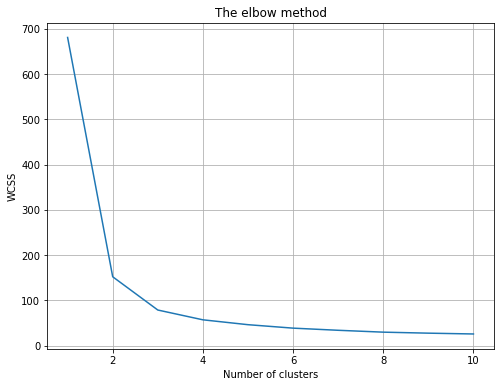

In [4]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
fig=plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

It can clearly be seen clearly why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the clusters

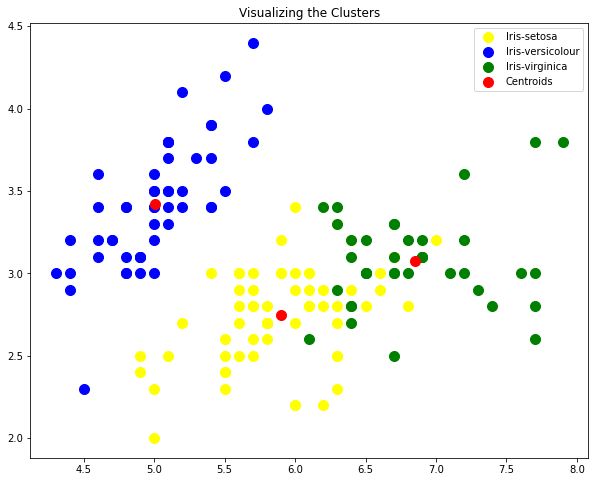

In [6]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')


plt.title("Visualizing the Clusters")
plt.legend()
plt.show()